# SciPy

### SciPy builds on NumPy and its tools, and provides a large number of functions that operate on numpy arrays and are 
### Useful for different types of scientific and engineering applications.

## Image operations

SciPy provides some basic functions to work with images. For example, it has functions to read images from disk into numpy arrays, to write numpy arrays to disk as images, and to resize images. Here is a simple example that showcases these functions:



Something importan for that you might find useful if you like matlab is:
The functions scipy.io.loadmat and scipy.io.savemat allow you to read and write MATLAB files. You can read about them in the documentation.


In [2]:
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
from scipy import misc
import imageio
#from scipy.misc import imsave

#Writing an array to a file:
f = misc.face()
imageio.imwrite('./data_course/face.png', f) # uses the Image module (PIL)


plt.imshow(f)
plt.show()

<Figure size 640x480 with 1 Axes>

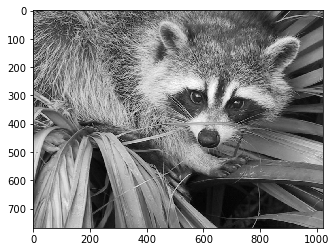

In [17]:
#Use matplotlib and imshow to display an image inside a matplotlib figure:

f = misc.face(gray=True)  # retrieve a grayscale image
import matplotlib.pyplot as plt
plt.imshow(f, cmap=plt.cm.gray)   

(-0.5, 1023.5, 767.5, -0.5)

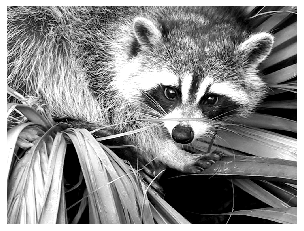

In [18]:
#Increase contrast by setting min and max values:

plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)        

# Remove axes and ticks
plt.axis('off')

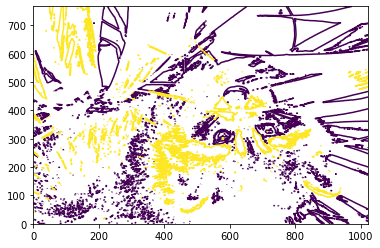

In [19]:
# draw contour lines

plt.contour(f, [50, 200])   

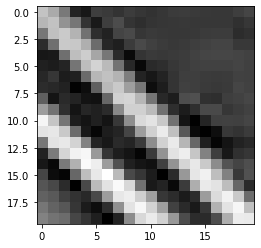

In [20]:
#For smooth intensity variations, use interpolation='bilinear'. 
#For fine inspection of intensity variations, use interpolation='nearest':


plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='bilinear')        

plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='nearest')        


### Basic Manipulations

In [3]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

In [4]:
face = misc.face(gray=True)
face[0, 40]

# Slicing
face[10:13, 20:23]

face[100:120] = 255

lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# Masks
face[mask] = 0
# Fancy indexing
face[range(400), range(400)] = 255
plt.show()
print(face)

[[255   0   0 ...   0   0   0]
 [  0 255   0 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [5]:
PDF('./data_course/sphx_glr_plot_numpy_array_001.png',size=(400,200))

In [6]:
face = misc.face(gray=True)
lx, ly = face.shape
# Cropping
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_face = np.flipud(face)
# rotation
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)

In [7]:
PDF('./data_course/sphx_glr_plot_geom_face_001.png',size=(600,150))

In [8]:
from scipy import misc
face = misc.face(gray=True)
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)
local_mean = ndimage.uniform_filter(face, size=11)

In [9]:
PDF('./data_course/sphx_glr_plot_blur_001.png',size=(700,200))

Documentation: 
http://scipy-lectures.org/advanced/image_processing/